## 1. Use Case

A company sells products in three regions: North, South, and West. The sales team wants to understand the sales performance across these regions to allocate resources more efficiently.

### Dataset

| Region | Monthly Sales (in thousands) |
|--------|------------------------------|
| North  | 12, 15, 14, 13, 17, 19, 20    |
| South  | 22, 21, 20, 23, 25, 26, 28    |
| West   | 32, 30, 31, 29, 30, 33, 35    |


In [5]:
sales_data = {
    "North": [12, 15, 14, 13, 17, 19, 20],
    "South": [22, 21, 20, 23, 25, 26, 28],
    "West": [32, 30, 31, 29, 30, 33, 35]
}


#### Question 1: Which region has the highest average monthly sales?

In [6]:
# Calculate the average sales for each region
average_sales = {region: sum(sales) / len(sales) for region, sales in sales_data.items()}

# Find the region with the highest average sales
highest_average_region = max(average_sales, key=average_sales.get)
highest_average_sales = average_sales[highest_average_region]

highest_average_region, highest_average_sales

('West', 31.428571428571427)

#### Question 2: Which region has the most consistent monthly sales (lowest variability)?

In [4]:
import math

# Calculate the standard deviation for each region
SD = {region: math.sqrt(sum((sale - average_sales[region]) ** 2 for sale in sales) / len(sales)) for region, sales in sales_data.items()}

# Find the region with the lowest SD
lowest_SD_region = min(SD, key=SD.get)
lowest_SD_sales = SD[lowest_SD_region]

lowest_SD_region, lowest_SD_sales

('West', 1.9166296949998198)

### 2. Use Case

An e-commerce company analyzes its website’s page load times in seconds over a month to optimize user experience. The data includes:

| Day | Load Times (seconds) |
|------|----------------------------------------------------------------|
| 1 | 3, 2.5, 2.8, 3.1, 15 (Outlier due to a server glitch) |
| 2 | 2.6, 2.5, 2.7, 2.9, 2.8 |
| 3 | 2.7, 2.8, 2.6, 2.5, 3 |
| ... | ... |

In [9]:
load_times_data = {
    1: [3, 2.5, 2.8, 3.1, 15],
    2: [2.6, 2.5, 2.7, 2.9, 2.8],
    3: [2.7, 2.8, 2.6, 2.5, 3]
}

#### Question 1: What impact do outliers have on the average load time?

In [22]:
# calculate average load time with outlier
avg_load_time_with_outlier = {key: sum(times)/len(times) for key,times in load_times_data.items()}
avg_load_time_with_outlier

{1: 5.279999999999999, 2: 2.7, 3: 2.7199999999999998}

In [23]:
# Calculate average load time without the maximum (outlier) for each day
avg_load_time_without_outlier = {
    day: sum(times) / len(times) if len(times) == 1 else (sum(times) - max(times)) / (len(times) - 1)
    for day, times in load_times_data.items()
}

avg_load_time_without_outlier

{1: 2.8499999999999996, 2: 2.65, 3: 2.65}

### Impact of Outliers on Average Load Time

Outliers can significantly impact the average (mean) load time, as the mean is sensitive to extreme values. Here's a detailed explanation of how outliers affect the average load time:

1. **Increase in Mean Value:**
   - Outliers that are much higher than the rest of the data points can increase the mean load time. For example, in the given dataset, the outlier value of 15 seconds on Day 1 will inflate the average load time, giving a misleading impression of overall performance.

2. **Misleading Insights:**
   - If outliers are not addressed, the average load time may not accurately reflect the typical user experience. This can lead to incorrect conclusions and decisions. For instance, an unusually high outlier can make it seem like the website is performing worse than it actually is for most users.

3. **Resource Allocation:**
   - Decisions on optimizing and allocating resources based on inflated averages due to outliers might lead to inefficient use of resources. Efforts might be directed towards addressing issues that are not representative of the general performance trends.



### Observations

- The mean load time with the outlier is 5.28 seconds.
- The mean load time without the outlier is 2.85 seconds.

This shows that the outlier (15 seconds) significantly inflates the average load time, leading to a higher mean value that does not accurately represent the typical load time experienced by most users.

### Conclusion

Outliers can have a substantial impact on the average load time, leading to misleading insights and potentially poor decision-making. It is crucial to identify and handle outliers appropriately to ensure accurate analysis and optimization of website performance.

#### Question 2: How can we transform load times to normalize the data?


In [28]:
#Applying Log Transformation
# Function to apply log transformation
def log_transformation(data):
    transformed_data = [np.log(x + 1) for x in data]  # +1 to handle zero values
    return transformed_data

# Apply log transformation to the load times for each day
log_transformed_load_times = {day: log_transformation(times) for day, times in load_times_data.items()}

log_transformed_load_times

{1: [1.3862943611198906,
  1.252762968495368,
  1.33500106673234,
  1.410986973710262,
  2.772588722239781],
 2: [1.2809338454620642,
  1.252762968495368,
  1.308332819650179,
  1.3609765531356006,
  1.33500106673234],
 3: [1.308332819650179,
  1.33500106673234,
  1.2809338454620642,
  1.252762968495368,
  1.3862943611198906]}

In [29]:
# calculate average after transormation
log_transformed_load_times = {key: sum(times)/len(times) for key,times in log_transformed_load_times.items()}
log_transformed_load_times

{1: 1.6315268184595282, 2: 1.3076014506951101, 3: 1.3126650122919683}

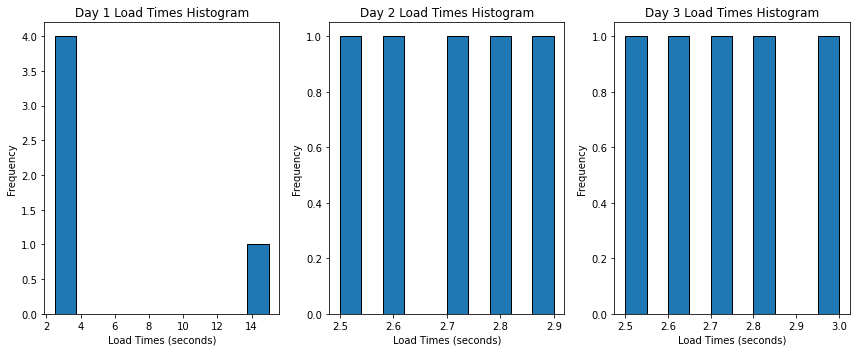

In [33]:
import matplotlib.pyplot as plt

# Data for Day 2 and Day 3 load times
day1_load_times= load_times_data[1]
day2_load_times = load_times_data[2]
day3_load_times = load_times_data[3]

# Create figure and axes for subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Plot histogram for Day 2
ax1.hist(day1_load_times, bins=10, edgecolor='black')
ax1.set_title('Day 1 Load Times Histogram')
ax1.set_xlabel('Load Times (seconds)')
ax1.set_ylabel('Frequency')
# Plot histogram for Day 2
ax2.hist(day2_load_times, bins=10, edgecolor='black')
ax2.set_title('Day 2 Load Times Histogram')
ax2.set_xlabel('Load Times (seconds)')
ax2.set_ylabel('Frequency')

# Plot histogram for Day 3
ax3.hist(day3_load_times, bins=10, edgecolor='black')
ax3.set_title('Day 3 Load Times Histogram')
ax3.set_xlabel('Load Times (seconds)')
ax3.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### What is the Probability Density Function (PDF) for day 2's load times?

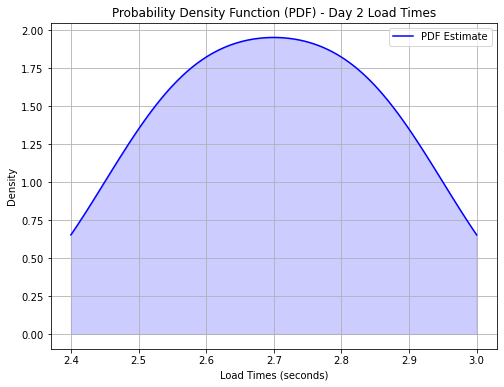

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data for Day 2 load times
day2_load_times = [2.6, 2.5, 2.7, 2.9, 2.8]

# Create a kernel density estimate
kde = gaussian_kde(day2_load_times)

# Define the range of x values for plotting
x_vals = np.linspace(min(day2_load_times) - 0.1, max(day2_load_times) + 0.1, 100)

# Evaluate the PDF at each x value
pdf_values = kde.evaluate(x_vals)

# Plotting the PDF
plt.figure(figsize=(8, 6))
plt.plot(x_vals, pdf_values, label='PDF Estimate', color='blue')
plt.fill_between(x_vals, pdf_values, alpha=0.2, color='blue')
plt.title('Probability Density Function (PDF) - Day 2 Load Times')
plt.xlabel('Load Times (seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


#### What is the Probability Mass Function (PMF) for load times on day 3?

In [36]:
from collections import Counter

# Data for Day 3 load times
day3_load_times = [2.7, 2.8, 2.6, 2.5, 3]

# Count frequencies of each load time
frequency = Counter(day3_load_times)

# Total number of observations
total_obs = len(day3_load_times)

# Calculate PMF for each load time
pmf = {key: count / total_obs for key, count in frequency.items()}

# Print PMF values
for load_time, probability in pmf.items():
    print(f"Load Time: {load_time}, PMF: {probability}")


Load Time: 2.7, PMF: 0.2
Load Time: 2.8, PMF: 0.2
Load Time: 2.6, PMF: 0.2
Load Time: 2.5, PMF: 0.2
Load Time: 3, PMF: 0.2


### UseCase 3
A pharmaceutical company has developed a new drug. During clinical trials, they measured the time (in hours) it took for patients to show
symptom relief. They're particularly interested in how quickly the drug works.


| Patient Number | Relief Time (hours) |
|----------------|---------------------|
| 1 | 3.5 |
| 2 | 2.8 |
| 3 | 4.1 |


#### Question 1: Do the relief times follow a normal distribution?


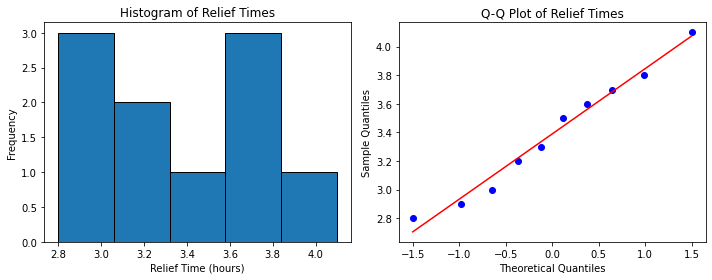

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Relief times data (example data)
relief_times = [3.5, 2.8, 4.1, 2.9, 3.2, 3.7, 3.0, 3.8, 3.3, 3.6]

# Plotting histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(relief_times, bins=5, edgecolor='black')
plt.title('Histogram of Relief Times')
plt.xlabel('Relief Time (hours)')
plt.ylabel('Frequency')

# Plotting Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(relief_times, dist="norm", plot=plt)
plt.title('Q-Q Plot of Relief Times')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


In [39]:
# Shapiro-Wilk test
statistic, p_value = stats.shapiro(relief_times)
print(f"Shapiro-Wilk Test:")
print(f" - W-statistic: {statistic}")
print(f" - p-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Conclusion: Relief times likely follow a normal distribution (fail to reject H0)")
else:
    print("Conclusion: Relief times do not follow a normal distribution (reject H0)")


Shapiro-Wilk Test:
 - W-statistic: 0.969671905040741
 - p-value: 0.887786865234375
Conclusion: Relief times likely follow a normal distribution (fail to reject H0)


#### Question 2: What percentage of patients experienced relief within 3 hours, assuming the data follows a normal distribution?


In [40]:
from scipy.stats import norm

# Assumed parameters (mean and standard deviation)
mean_relief_time = 3.5  # mean from the example dataset
std_dev_relief_time = 0.5  # standard deviation from the example dataset

# Time threshold for relief
threshold_time = 3  # hours

# Standardize the threshold time
Z = (threshold_time - mean_relief_time) / std_dev_relief_time

# Calculate the probability using the CDF of standard normal distribution
probability_within_3_hours = norm.cdf(Z)

# Convert probability to percentage
percentage_within_3_hours = probability_within_3_hours * 100

print(f"Percentage of patients who experienced relief within 3 hours: {percentage_within_3_hours:.2f}%")


Percentage of patients who experienced relief within 3 hours: 15.87%
